A/B Hypothesis Testing for Insurance Risk Analytics
Data loaded successfully: (1000098, 52)

Data columns: ['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet', 'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium', 'TotalClaims']

DATA PREPARATION
Dataset shape: (1000098, 53)
Date range: 2013-10-01 00:00:00 to 2015-08-0

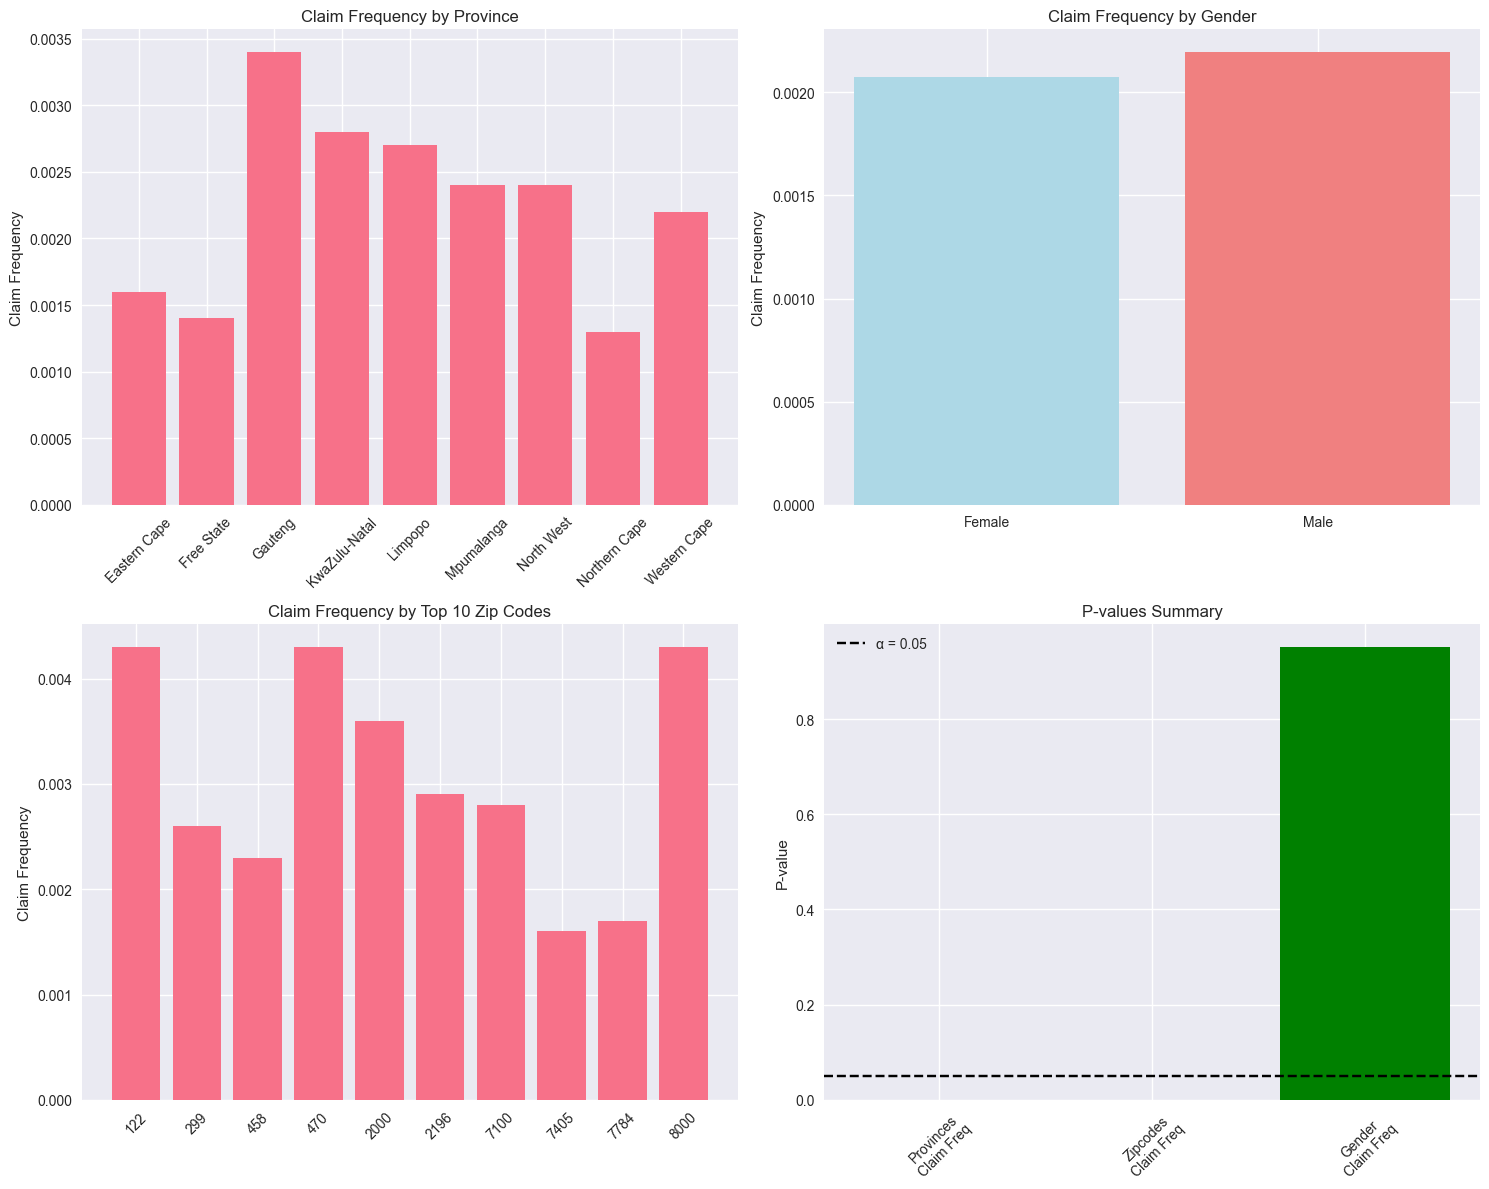


BUSINESS RECOMMENDATIONS
1. 🏛️ PROVINCIAL RISK ADJUSTMENT: Significant risk differences detected across provinces. Consider implementing province-specific premium adjustments. Analyze high-risk provinces for targeted risk mitigation strategies.

2. 📍 GEOGRAPHIC SEGMENTATION: Significant risk differences between zip codes detected. Implement zip code-level risk scoring and premium adjustments. Consider micro-geographic factors in underwriting.

3. 👥 GENDER EQUALITY: No significant risk differences between genders. Current gender-neutral approach is statistically supported.


GENERATING STATISTICAL REPORT


UnicodeEncodeError: 'charmap' codec can't encode character '\u2080' in position 308: character maps to <undefined>

In [5]:
# Cell 1: Setup and Imports
import sys
import os
sys.path.append('../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistical_testing import HypothesisTests, StatisticalAnalyzer
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("A/B Hypothesis Testing for Insurance Risk Analytics")
print("=" * 60)

# Cell 2: Data Loading
# Load your insurance data
try:
    # Update this path to your actual data file
    data = pd.read_csv('../data/processed/insurance_data.csv')  # Update path as needed
    print(f"Data loaded successfully: {data.shape}")
    print("\nData columns:", data.columns.tolist())
except FileNotFoundError:
    print("Please update the data path to your insurance dataset")
    # Create sample data structure for demonstration
    data = pd.DataFrame()

# Ensure HasClaim column exists
if 'TotalClaims' in data.columns and 'HasClaim' not in data.columns:
    data['HasClaim'] = (data['TotalClaims'] > 0).astype(int)

# Cell 3: Data Preparation and Overview
print("\n" + "="*60)
print("DATA PREPARATION")
print("="*60)

# Basic data info
print(f"Dataset shape: {data.shape}")
print(f"Date range: {data['TransactionMonth'].min()} to {data['TransactionMonth'].max()}")

# Check key columns for hypothesis testing
required_columns = ['Province', 'PostalCode', 'Gender', 'TotalPremium', 'TotalClaims']
missing_columns = [col for col in required_columns if col not in data.columns]

if missing_columns:
    print(f"Warning: Missing required columns: {missing_columns}")
else:
    print("✅ All required columns present")

# Data quality check
print("\nData Quality Assessment:")
print(f"Missing values per column:")
for col in required_columns:
    if col in data.columns:
        missing_pct = (data[col].isnull().sum() / len(data)) * 100
        print(f"  {col}: {missing_pct:.2f}%")

# Cell 4: Initialize Hypothesis Testing
print("\n" + "="*60)
print("HYPOTHESIS TESTING INITIALIZATION")
print("="*60)

# Initialize hypothesis testing class
hypothesis_tester = HypothesisTests(data)
statistical_analyzer = StatisticalAnalyzer(data)

print("✅ Hypothesis testing framework initialized")
print(f"✅ Risk metrics calculated:")
print(f"   - Claim Frequency: {hypothesis_tester.data['HasClaim'].mean():.4f}")
print(f"   - Average Claim Amount: ${hypothesis_tester.data['TotalClaims'].mean():.2f}")
print(f"   - Average Premium: ${hypothesis_tester.data['TotalPremium'].mean():.2f}")
print(f"   - Average Margin: ${hypothesis_tester.data['Margin'].mean():.2f}")

# Cell 5: Test 1 - Risk Differences Across Provinces
print("\n" + "="*60)
print("TEST 1: RISK DIFFERENCES ACROSS PROVINCES")
print("="*60)

print("H₀: There are no risk differences across provinces")
print("H₁: There are risk differences across provinces")
print()

province_results = hypothesis_tester.test_risk_differences_provinces(alpha=0.05)

print("RESULTS:")
print("-" * 30)

# Claim Frequency Results
if 'claim_frequency' in province_results:
    freq_result = province_results['claim_frequency']
    print(f"Claim Frequency Test ({freq_result['test_type']}):")
    print(f"  Chi-squared statistic: {freq_result['chi2_statistic']:.4f}")
    print(f"  P-value: {freq_result['p_value']:.6f}")
    print(f"  Decision: {freq_result['interpretation']}")
    print()

# Claim Severity Results
if 'claim_severity' in province_results:
    sev_result = province_results['claim_severity']
    print(f"Claim Severity Test ({sev_result['test_type']}):")
    print(f"  F-statistic: {sev_result['f_statistic']:.4f}")
    print(f"  P-value: {sev_result['p_value']:.6f}")
    print(f"  Decision: {sev_result['interpretation']}")

# Display descriptive statistics
print("\nDescriptive Statistics by Province:")
print(province_results['descriptive_stats'].round(4))

# Cell 6: Test 2 - Risk Differences Between Zip Codes
print("\n" + "="*60)
print("TEST 2: RISK DIFFERENCES BETWEEN ZIP CODES")
print("="*60)

print("H₀: There are no risk differences between zip codes")
print("H₁: There are risk differences between zip codes")
print()

zipcode_results = hypothesis_tester.test_risk_differences_zipcodes(alpha=0.05, top_n=10)

print("RESULTS (Top 10 Zip Codes by Policy Count):")
print("-" * 40)

# Claim Frequency Results
if 'claim_frequency' in zipcode_results:
    freq_result = zipcode_results['claim_frequency']
    print(f"Claim Frequency Test ({freq_result['test_type']}):")
    print(f"  Chi-squared statistic: {freq_result['chi2_statistic']:.4f}")
    print(f"  P-value: {freq_result['p_value']:.6f}")
    print(f"  Decision: {freq_result['interpretation']}")
    print()

# Margin Differences Results
if 'margin_differences' in zipcode_results:
    margin_result = zipcode_results['margin_differences']
    print(f"Margin Differences Test ({margin_result['test_type']}):")
    print(f"  F-statistic: {margin_result['f_statistic']:.4f}")
    print(f"  P-value: {margin_result['p_value']:.6f}")
    print(f"  Decision: {margin_result['interpretation']}")

print(f"\nZip Codes Analyzed: {zipcode_results['top_zipcodes_analyzed']}")

# Cell 7: Test 3 - Margin Differences Between Zip Codes
print("\n" + "="*60)
print("TEST 3: MARGIN DIFFERENCES BETWEEN ZIP CODES")
print("="*60)

print("H₀: There are no significant margin (profit) differences between zip codes")
print("H₁: There are significant margin differences between zip codes")
print()

margin_results = hypothesis_tester.test_margin_differences_zipcodes(alpha=0.05, top_n=10)

print("RESULTS:")
print("-" * 30)

if 'test_results' in margin_results:
    margin_test = margin_results['test_results']
    print(f"Margin Test ({margin_test['test_type']}):")
    print(f"  F-statistic: {margin_test['f_statistic']:.4f}")
    print(f"  P-value: {margin_test['p_value']:.6f}")
    print(f"  Decision: {margin_test['interpretation']}")
else:
    print("Note: This test is included in the zip code analysis above")

# Cell 8: Test 4 - Risk Differences Between Genders
print("\n" + "="*60)
print("TEST 4: RISK DIFFERENCES BETWEEN GENDERS")
print("="*60)

print("H₀: There are no significant risk differences between Women and Men")
print("H₁: There are significant risk differences between genders")
print()

gender_results = hypothesis_tester.test_risk_differences_gender(alpha=0.05)

print("RESULTS:")
print("-" * 30)

# Claim Frequency Results
if 'claim_frequency' in gender_results:
    freq_result = gender_results['claim_frequency']
    print(f"Claim Frequency Test ({freq_result['test_type']}):")
    print(f"  Chi-squared statistic: {freq_result['chi2_statistic']:.4f}")
    print(f"  P-value: {freq_result['p_value']:.6f}")
    print(f"  Decision: {freq_result['interpretation']}")
    print()

# Claim Severity Results
if 'claim_severity' in gender_results:
    sev_result = gender_results['claim_severity']
    print(f"Claim Severity Test ({sev_result['test_type']}):")
    print(f"  Test statistic: {sev_result['test_statistic']:.4f}")
    print(f"  P-value: {sev_result['p_value']:.6f}")
    print(f"  Decision: {sev_result['interpretation']}")
    print()

# Premium Differences Results
if 'premium_differences' in gender_results:
    prem_result = gender_results['premium_differences']
    print(f"Premium Differences Test ({prem_result['test_type']}):")
    print(f"  T-statistic: {prem_result['test_statistic']:.4f}")
    print(f"  P-value: {prem_result['p_value']:.6f}")
    print(f"  Decision: {prem_result['interpretation']}")

# Display descriptive statistics
print("\nDescriptive Statistics by Gender:")
print(gender_results['descriptive_stats'].round(4))

# Cell 9: Comprehensive Analysis and Visualization
print("\n" + "="*60)
print("COMPREHENSIVE ANALYSIS RESULTS")
print("="*60)

# Run all tests together
all_results = hypothesis_tester.run_all_tests(alpha=0.05)

# Ensure the directory exists before saving the figure
os.makedirs('../reports/figures/hypothesis_testing/', exist_ok=True)

# Create comprehensive visualizations
fig = statistical_analyzer.create_comparison_plots(
    all_results, 
    save_path='../reports/figures/hypothesis_testing/comprehensive_analysis.png'
)
plt.show()

# Generate business recommendations
recommendations = hypothesis_tester.get_business_recommendations()

print("\n" + "="*60)
print("BUSINESS RECOMMENDATIONS")
print("="*60)

for i, recommendation in enumerate(recommendations, 1):
    print(f"{i}. {recommendation}")
    print()

# Cell 10: Statistical Report Generation
print("\n" + "="*60)
print("GENERATING STATISTICAL REPORT")
print("="*60)

# Generate comprehensive report
report_text = statistical_analyzer.generate_statistical_report(
    all_results, 
    save_path='../reports/task3_hypothesis_testing_report.md'
)

print("✅ Statistical report generated and saved")
print("✅ Visualizations saved to reports/figures/hypothesis_testing/")

# Summary of all p-values
print("\nSUMMARY OF P-VALUES:")
print("-" * 30)

summary_table = []
for category, results in all_results.items():
    if isinstance(results, dict):
        for test_name, test_result in results.items():
            if isinstance(test_result, dict) and 'p_value' in test_result:
                summary_table.append({
                    'Category': category.title(),
                    'Test': test_name.replace('_', ' ').title(),
                    'P-value': f"{test_result['p_value']:.6f}",
                    'Significant': '✅ Yes' if test_result['p_value'] < 0.05 else '❌ No',
                    'Decision': 'Reject H₀' if test_result['p_value'] < 0.05 else 'Fail to Reject H₀'
                })

summary_df = pd.DataFrame(summary_table)
print(summary_df.to_string(index=False))

print(f"\n✅ Task 3 Analysis Complete!")
print(f"✅ {len(summary_table)} hypothesis tests conducted")
print(f"✅ Results saved to reports directory")